In [1]:
libraries <- c("ggplot2", "arrow", "tidyr", "stringr", "ggmagnify")
for (lib in libraries) {
    if ("ggmagnify" == lib) {
        if (!requireNamespace("ggmagnify", quietly = TRUE)) {
            install.packages("remotes")
            remotes::install_github("hughjonesd/ggmagnify")
        }
    }
    suppressPackageStartupMessages(
        suppressWarnings(
            library(lib, character.only = TRUE)
        )
    )
}
source("../../utils/r_themes.r")

In [2]:
offset_df <- arrow::read_parquet("../results/all_offset_results.parquet")
metadata_df <- read.csv("../../data/platemap_6hr_4ch.csv")
figures_dir <- "../figures/offsets/"
if (!dir.exists(figures_dir)) {
  dir.create(figures_dir)
}
# get the well from the wellfov 
split_columns <- str_split_fixed(offset_df$well_fov, "_", 2)
offset_df$well <- split_columns[, 1]
# merge the metadata with the offset_df on the well column
offset_df <- merge(offset_df, metadata_df, by = "well")

In [3]:
offset_df$dose <- as.character(offset_df$dose)
offset_df$dose <- factor(
    offset_df$dose, 
    levels = c(
        '0',
        '0.61',
        '1.22',
        '2.44',
        '4.88',
        '9.77',
        '19.53',
        '39.06',
        '78.13',
        '156.25'
    )
)
unique(offset_df$dose)

[1] 0      0.61   1.22   2.44   4.88   9.77   19.53  39.06  78.13  156.25
Levels: 0 0.61 1.22 2.44 4.88 9.77 19.53 39.06 78.13 156.25

In [4]:
# plotting image line 
# where the line forms a box
# -950 to 950
box_coordinates <- data.frame(
  x = c(-950, 950, 950, -950, -950),
  y = c(-950, -950, 950, 950, -950)
)

In [5]:
head(offset_df)

,well,well_fov,x_offset,y_offset,plate,compound,dose,control
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<fct>,<chr>
1,C-02,C-02_F0001,-184,-6,1,Staurosporine,0,negative
2,C-02,C-02_F0002,-182,-13,1,Staurosporine,0,negative
3,C-02,C-02_F0003,-181,-18,1,Staurosporine,0,negative
4,C-02,C-02_F0004,-184,-18,1,Staurosporine,0,negative
5,C-03,C-03_F0001,-167,-24,1,Staurosporine,0.61,test
6,C-03,C-03_F0002,-164,-27,1,Staurosporine,0.61,test


In [6]:
width <- 8
height <- 8
dpi <- 600
options(repr.plot.width=width, repr.plot.height=height)
# plot the results
offsets_plot <- (
    ggplot(offset_df, aes(x = x_offset, y = y_offset, color= dose))
    + geom_point(aes(color = dose), alpha = 0.6, size = 2)
    + theme_bw()
    + labs(
        x = "X Offset (pixels)",
        y = "Y Offset (pixels)",
        color = "Stuarosporine dose (nM)"
    )
    + scale_color_manual(values = color_palette_dose)

    + theme(
        legend.position = "right",
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 16),
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        axis.text.x = element_text(size = 16),
        axis.text.y = element_text(size = 16)
    )
    # make points in legend alpha 1
    + guides(color = guide_legend(override.aes = list(alpha = 1, size = 5)))
    # plot the box
    + geom_polygon(data = box_coordinates, aes(x = x, y = y), fill = NA, color = "black", size = 1)
    + ggplot2::coord_fixed(ratio = 1)
)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


Warning message:
“Duplicated aesthetics after name standardisation: colour”
Warning message in layer_sf(geom = ggproto(NULL, GeomMagnify), mapping = mapping, :
“Ignoring unknown parameters: `size` and `fill`”


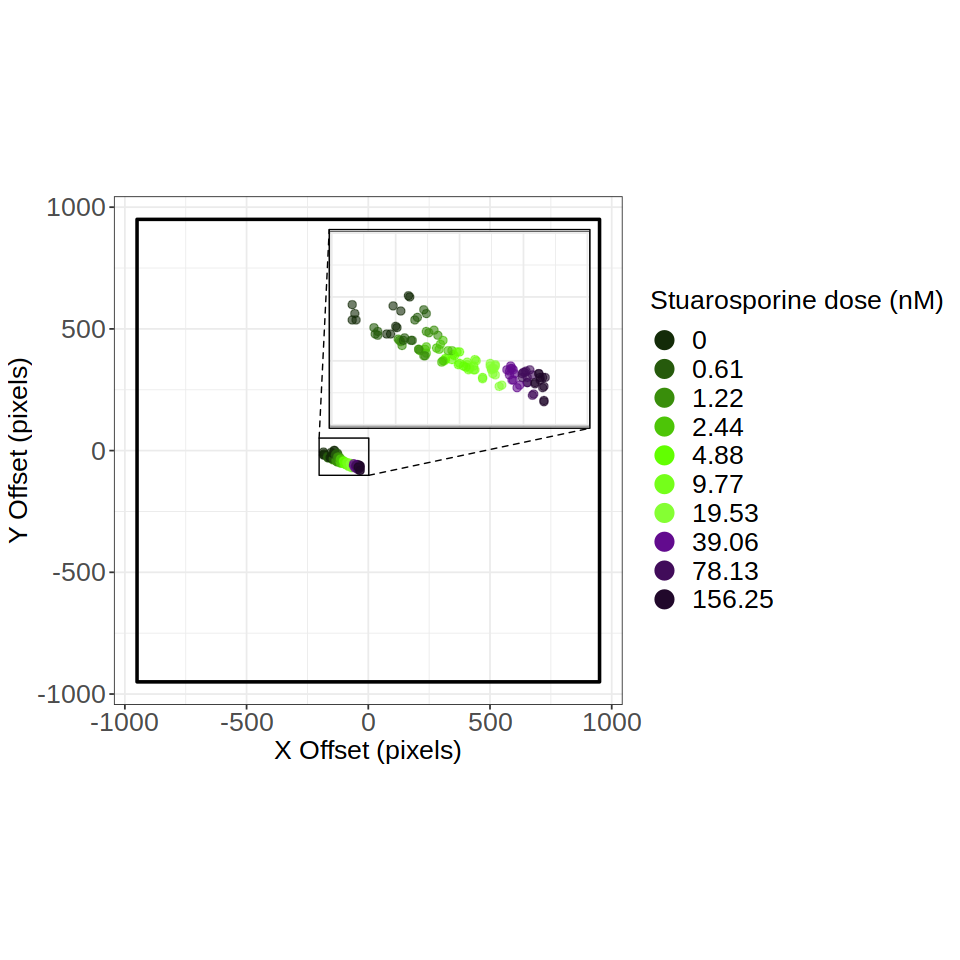

In [7]:
from <- c(
    xmin = -200, 
    xmax = 0,
    ymin = -100,
    ymax = 50
)
to <- c(
    xmin = -150,
    xmax = 900,
    ymin = 100,
    ymax = 900
)
# place the zoomed in plot on the main plot
offsets_plot_with_zoom <- (
    offsets_plot 
    + geom_magnify(
        from = from,
        to = to,
        size = 0.25,
        fill = "white",
        color = "black",
        expand = 0.02
    )
)
ggsave(
    offsets_plot_with_zoom,
    filename = "../figures/offsets_plot.png",
    width = 8,
    height = 8,
    dpi = 300
)
offsets_plot_with_zoom